© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [ ]:
import numpy as np # type: ignore
from astropy.io import fits # type: ignore
from WaLSAtools import WaLSAtools, WaLSA_save_pdf, WaLSA_histo_opt # type: ignore

#--------------------------------------------------------------------------

# Load synthetic data
data_dir = 'Synthetic_Data/'

hdul = fits.open(data_dir + 'NRMP_signal_3D.fits')
signal_3d = hdul[0].data  # 3D synthetic signal data
time = hdul[1].data  # Time array
hdul.close()

cadence = 0.5  # cadence in seconds

# Dominant Frequency and Mean Power Analysis using WaLSAtools - FFT
FFT_dominant_frequency, FFT_averaged_power, FFT_frequencies, FFT_pm = WaLSAtools(
    signal=signal_3d,
    time=time,
    method='fft',
    format='txy',
    averagedpower=True,
    dominantfreq=True
)
# Normalize FFT averaged power to its maximum value
FFT_averaged_power_normalized = 100 * FFT_averaged_power / np.max(FFT_averaged_power)

# Dominant Frequency and Mean Power Analysis using WaLSAtools - RGWS-Morlet
Morlet_dominant_frequency, Morlet_averaged_power, Morlet_frequencies, Morlet_pm = WaLSAtools(
    signal=signal_3d,
    time=time,
    method='wavelet',
    mother='morlet',
    RGWS=True,
    siglevel=0.95,
    format='txy',
    averagedpower=True,
    dominantfreq=True
)
# Normalize RGWS-Morlet averaged power to its maximum value
Morlet_averaged_power_normalized = 100 * Morlet_averaged_power / np.max(Morlet_averaged_power)

# Dominant Frequency and Mean Power Analysis using WaLSAtools - RGWS-Paul
Paul_dominant_frequency, Paul_averaged_power, Paul_frequencies, Paul_pm = WaLSAtools(
    signal=signal_3d,
    time=time,
    method='wavelet',
    mother='paul',
    RGWS=True,
    siglevel=0.95,
    format='txy',
    averagedpower=True,
    dominantfreq=True
)
# Normalize RGWS-Paul averaged power to its maximum value
Paul_averaged_power_normalized = 100 * Paul_averaged_power / np.max(Paul_averaged_power)


Processing FFT for a 3D cube with format 'txy' and shape (200, 130, 130).
Calculating Dominant frequencies and/or averaged power spectrum (FFT) ....


Processing x: 100%|██████████| 130/130 [00:02<00:00, 62.23it/s]



Analysis completed.
Processing Wavelet for a 3D cube with format 'txy' and shape (200, 130, 130).
Calculating Dominant frequencies and/or averaged power spectrum (Wavelet) ....


Processing x: 100%|██████████| 130/130 [00:45<00:00,  2.84it/s]



Analysis completed.
Processing Wavelet for a 3D cube with format 'txy' and shape (200, 130, 130).
Calculating Dominant frequencies and/or averaged power spectrum (Wavelet) ....


Processing x: 100%|██████████| 130/130 [01:01<00:00,  2.12it/s]


Analysis completed.


GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/Fig4_dominant_frequency_mean_power_spectra.pdf'


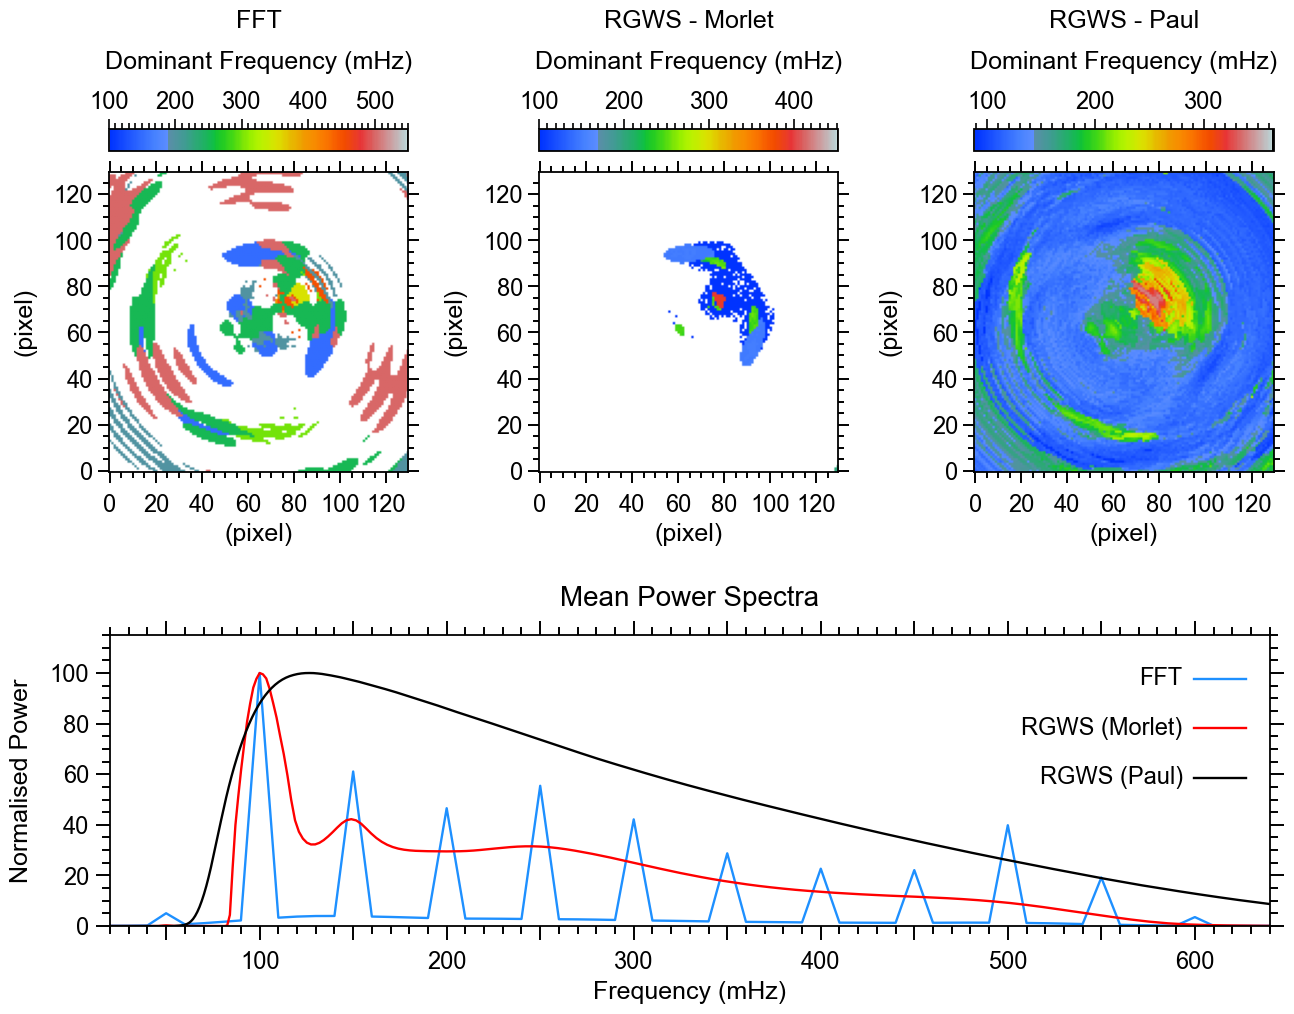

In [ ]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from matplotlib.ticker import AutoMinorLocator # type: ignore
from matplotlib.colors import ListedColormap # type: ignore
from mpl_toolkits.axes_grid1 import make_axes_locatable # type: ignore
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # type: ignore

# Set up the figure layout
fig = plt.figure(figsize=(12.8, 10))

# Top row: 3 squared images
positions_top = [
    [0.079, 0.484, 0.234, 0.4],  # Left image
    [0.415, 0.484, 0.234, 0.4],  # Center image
    [0.755, 0.484, 0.234, 0.4]   # Right image
]

# Define visualization parameters
xticks_labels = ['0', ' ', '40', ' ', '80', ' ', '120']

# Load the RGB values from the IDL file and create the color map
rgb_values = np.loadtxt('Color_Tables/idl_walsa_powercolor_1.txt')
rgb_values[0,:] = [255.0,255.0,255.0]
rgb_values[255,:] = [0.,0.,0.]
rgb_values = rgb_values / 255.0 
idl_colormap = ListedColormap(rgb_values)

# Setting global parameters
plt.rcParams.update({
    'font.family': 'sans-serif',     # Use sans-serif fonts
    'font.sans-serif': 'Arial',   # Set Helvetica as the default sans-serif font
    'font.size': 19,          # Global font size
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 17,    # X-axis tick label font size
    'ytick.labelsize': 17,    # Y-axis tick label font size
    'legend.fontsize': 15,    # Legend font size
    'figure.titlesize': 19,   # Figure title font size
    'axes.grid': False,        # Turn on grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
    'font.weight': 'medium',      # Make all fonts bold
    'axes.titleweight': 'medium', # Make title font bold
    'axes.labelweight': 'medium' # Make axis labels bold
})

plt.rc('axes', linewidth=1.3)
plt.rc('lines', linewidth=1.7)

# Plot the three snapshots in the top row
for i in range(3):
    if i == 0:
        im = FFT_dominant_frequency*1000 # Convert to mHz
        colorbar_label = 'FFT\nDominant Frequency (mHz)'
    elif i == 1:
        im = Morlet_dominant_frequency*1000 # Convert to mHz
        colorbar_label = 'RGWS - Morlet\nDominant Frequency (mHz)'
    else:
        im = Paul_dominant_frequency*1000 # Convert to mHz
        colorbar_label = 'RGWS - Paul\nDominant Frequency (mHz)'
    
    ax = fig.add_axes(positions_top[i])  # Create each subplot in specified position
    
    DF = ax.imshow(WaLSA_histo_opt(im), cmap=idl_colormap, aspect='equal', origin='lower', vmin=im.min(), vmax=im.max())

    # Configure axis ticks and labels
    ax.tick_params(axis='both', which='both', direction='out', top=True, right=True)
    ax.set_xticks(np.arange(0, 130, 20))
    ax.set_yticks(np.arange(0, 130, 20))
    ax.tick_params(axis='both', which='major', length=8, width=1.4)  # Major ticks
    ax.tick_params(axis='x', which='major', pad=8)  # Major ticks
    ax.tick_params(axis='both', which='minor', length=4, width=1.4)  # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.set_xlabel('(pixel)')
    ax.set_ylabel('(pixel)', labelpad=12)

    # Create an inset color bar axis above the plot
    divider = make_axes_locatable(ax)
    cax = inset_axes(ax, width="100%", height="7.5%", loc='upper center', borderpad=-2.1)
    cbar = plt.colorbar(DF, cax=cax, orientation='horizontal')
    # Move color bar label to the top of the bar
    cbar.set_label(colorbar_label, labelpad=16, linespacing=2)
    cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
    cbar.ax.xaxis.set_label_position('top')
    # Adjust tick marks for the color bar
    cbar.ax.tick_params(axis='x', which='major', length=7, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
    cbar.ax.tick_params(axis='x', which='minor', length=4, width=1.2, direction='out', top=True, bottom=False)
    # Set colorbar ticks and labels
    cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
    # Set minor ticks
    cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(10)) 
    # Define the range of the color bar and set major ticks at intervals of 100
    tick_min = np.floor(DF.get_clim()[0]) 
    tick_max = np.ceil(DF.get_clim()[1]) 
    major_ticks = np.arange(np.ceil(tick_min / 100) * 100, tick_max + 1, 100)  
    cbar.set_ticks(major_ticks)
    cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Bottom row: 1D signal plot filling the entire row
ax1d = fig.add_axes([0.08, 0.08, 0.906, 0.291])  # [left, bottom, width, height]
ax1d.plot(FFT_frequencies*1000, FFT_averaged_power_normalized, color='DodgerBlue', label='FFT')
ax1d.plot(Morlet_frequencies*1000, Morlet_averaged_power_normalized, color='Red', label='RGWS (Morlet)')
ax1d.plot(Paul_frequencies*1000, Paul_averaged_power_normalized, color='Black', label='RGWS (Paul)')
ax1d.set_title('Mean Power Spectra', pad=21)
ax1d.set_xlabel('Frequency (mHz)', labelpad=5)
ax1d.set_ylabel('Normalised Power', labelpad=12)
ax1d.set_xlim([20, 640])
ax1d.set_ylim(0, 115)
# Set tick marks outside for all four axes
ax1d.tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
xtick_positions = range(50, 650, 50)  # Major tick marks every 50
xlabel_positions = range(100, 700, 100)  # Labels every 100
ax1d.set_xticks(xtick_positions)
labels = [str(pos) if pos in xlabel_positions else '' for pos in xtick_positions]
ax1d.set_xticklabels(labels)
ax1d.set_yticks(np.arange(0, 115, 20))
# Custom tick sizes and thickness
ax1d.tick_params(axis='both', which='major', length=10, width=1.4, pad=5)  # Major ticks
ax1d.tick_params(axis='x', which='major', pad=8)  # Major ticks
ax1d.tick_params(axis='both', which='minor', length=6, width=1.4)  # Minor ticks
# Set minor ticks
ax1d.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1d.yaxis.set_minor_locator(AutoMinorLocator(4))
# Add custom labels manually to the plot .... to align the labels to the right
handles, labels = ax1d.get_legend_handles_labels()
# Define the vertical offset for each legend item
offset = 0.17
for i, (handle, label) in enumerate(zip(handles, labels)):
    # Add the colored line
    ax1d.plot(
        [0.935, 0.98],  # x coordinates (start and end of the line)
        [0.85 - offset * i, 0.85 - offset * i],  # y coordinates (constant to make it horizontal)
        transform=ax1d.transAxes,
        color=handle.get_color(),  # Use the color from the original handle
        linestyle=handle.get_linestyle(),  # Use the linestyle from the original handle
        linewidth=handle.get_linewidth(),  # Use the linewidth from the original handle
    )
    
    # Add the label text
    ax1d.text(
        0.925, 0.85 - offset * i, 
        label,
        transform=ax1d.transAxes,
        ha='right', va='center', fontsize=17, 
    )

#--------------------------------------------------------------------------

# Save the figure as a single PDF
pdf_path = 'Figures/Fig4_dominant_frequency_mean_power_spectra.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK')

plt.show()